In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split



In [58]:

df = pd.read_csv('D:\datasets\customer_churn_dataset-training-master.csv')
df = df.drop_duplicates()
df = df.drop(columns=['CustomerID'])
# Encode categorical columns
label_encoder = LabelEncoder()
for column in ['Gender', 'Subscription Type', 'Contract Length']:
    df[column] = label_encoder.fit_transform(df[column])

y = pd.DataFrame(df['Churn'])

ot = df[['Gender', 'Subscription Type']]

df = df.drop(columns=['Churn', 'Gender', 'Subscription Type'])

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df = pd.concat([df, ot.reset_index(drop=True),y], axis=1)

print(df.sample(5))


             Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
39399  -1.637403  0.159000         0.022420       0.128839      -0.359131   
63985   0.693345 -0.710277        -0.792838       1.105969      -0.116943   
338068 -0.994438 -0.420518         1.536472      -1.174002      -0.359131   
419924 -0.351473 -1.231844        -0.909304      -0.522581       0.730714   
274058  0.130751  1.491893         0.604748      -1.174002      -1.570070   

        Contract Length  Total Spend  Last Interaction  Gender  \
39399         -1.114664    -1.273309          1.340026       0   
63985          0.001687     1.064705          0.409382       0   
338068         1.118037     1.258847         -0.870253       1   
419924        -1.114664     1.486253         -0.172270       1   
274058        -1.114664     0.910470         -1.451906       1   

        Subscription Type  Churn  
39399                   0    1.0  
63985                   1    1.0  
338068                  2    0.0  


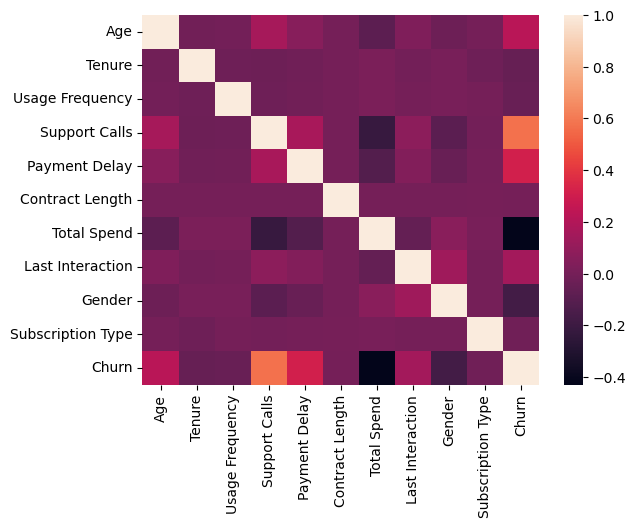

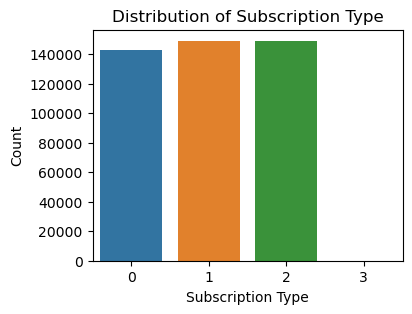

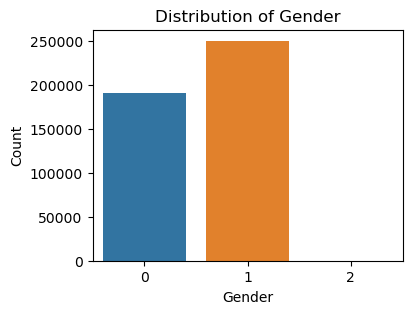

In [55]:
#EDA
cor = df.corr()
sns.heatmap(cor)

plt.figure(figsize=(4, 3))
sns.countplot(x='Subscription Type', data=df)
plt.title('Distribution of Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of 'Gender'
plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [56]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 138.1 kB/s eta 0:00:10
   -- ----------

In [60]:
df = df.dropna()
y = df['Churn']
X = df.drop(columns=['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
logreg = LogisticRegression()

# Initialize Sequential Feature Selector
sfs = SFS(logreg, 
          k_features=5, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5)

# Perform SFS
sfs = sfs.fit(X_train, y_train)

# Get the selected feature indices
selected_features = list(sfs.k_feature_idx_)
print(f"Selected features: {X.columns[selected_features]}")

# Get the performance of the selected feature subset
print(f"Cross-validation accuracy: {sfs.k_score_}")

# Train the model on the selected features
logreg.fit(X_train.iloc[:, selected_features], y_train)

# Evaluate the model on the test set
accuracy = logreg.score(X_test.iloc[:, selected_features], y_test)
print(f"Test set accuracy: {accuracy}")

# Optionally, display the selected features
print(f"\nSelected features dataframe sample:")
print(X_train.iloc[:, selected_features].head())

Selected features: Index(['Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction',
       'Gender'],
      dtype='object')
Cross-validation accuracy: 0.8489121221585011
Test set accuracy: 0.8473421550094518

Selected features dataframe sample:
        Support Calls  Payment Delay  Total Spend  Last Interaction  Gender
118311       1.105969       1.093996    -0.833114          1.456357       0
99593        0.128839       0.730714    -1.954364          1.340026       0
233797       2.083100       1.093996     0.337886          0.758374       0
406431       0.128839      -0.359131    -0.150232          0.060391       1
138508       0.780259       0.125245    -0.289101          1.223696       1
